In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import datetime as dt
import yfinance as yf
from dotenv import load_dotenv
import os
from pathlib import Path


Bad key "text.kerning_factor" on line 4 in
/Users/shanshanzhang/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
filepath = Path('bitcoin1.csv')
df_BTC1 = pd.read_csv(filepath, parse_dates=True, index_col="Date", infer_datetime_format=True)

filepath = Path('bitcoin2.csv')
df_BTC2 = pd.read_csv(filepath, parse_dates=True, index_col="Date", infer_datetime_format=True)

filepath = Path('bitcoinkai3.csv')
df_BTC3 = pd.read_csv(filepath, parse_dates=True, index_col="Date", infer_datetime_format=True)

In [3]:
frames = [df_BTC1, df_BTC2, df_BTC3]
df_combine = pd.concat(frames)
df_combine.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Sentiment
Date,,,,,,,,
2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,101467222687,0,0,0.062842
2021-02-09,46184.992188,48003.722656,45166.960938,46481.105469,91809846886,0,0,0.039114
2021-02-10,46469.761719,47145.566406,43881.152344,44918.183594,87301089896,0,0,0.082648
2021-02-11,44898.710938,48463.468750,44187.761719,47909.332031,81388911810,0,0,0.122292
2021-02-12,47877.035156,48745.734375,46424.976562,47504.851562,76555041196,0,0,0.101058


/Users/shanshanzhang/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


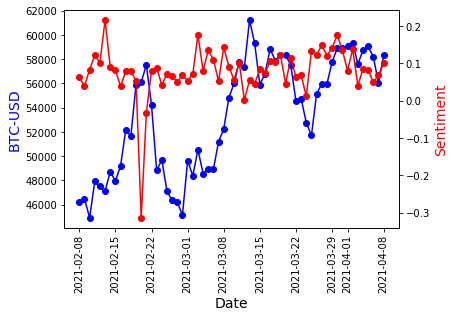

In [4]:
fig,ax = plt.subplots()
# make a plot
ax.plot(df_combine.index, df_combine["Close"], color="blue", marker="o")
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("BTC-USD",color="blue",fontsize=14)
plt.xticks(rotation = 90)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_combine.index, df_combine["Sentiment"],color="red",marker="o")
ax2.set_ylabel("Sentiment",color="red",fontsize=14)
plt.rcParams["figure.figsize"] = [80,40]
plt.show()


In [5]:
# cleaning data

df_combine.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
df_combine.head()


,Close,Sentiment
Date,,
2021-02-08,46196.464844,0.062842
2021-02-09,46481.105469,0.039114
2021-02-10,44918.183594,0.082648
2021-02-11,47909.332031,0.122292
2021-02-12,47504.851562,0.101058


In [6]:
# Create Signal
# buy = 1 
# No action = 0 
# Sell = -1 

conditions = [
    (df_combine['Sentiment'] > 0.1),
    (df_combine['Sentiment'] < 0.1) & (df_combine['Sentiment'] > -0.1),
    (df_combine['Sentiment'] < -0.1 ),
    ]
values = [1.0, 0.0, -1.0]

In [27]:
df_combine['Signals'] = np.select(conditions, values)
df_combine.head()

,Close,Sentiment,Signals,Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
Date,,,,,,,,,
2021-02-08,46196.464844,0.062842,0.0,0.0,0.000000,1000000.000000,1000000.000000,NaN,NaN
2021-02-09,46481.105469,0.039114,0.0,0.0,0.000000,1000000.000000,1000000.000000,0.000000,0.000000
2021-02-10,44918.183594,0.082648,0.0,0.0,0.000000,1000000.000000,1000000.000000,0.000000,0.000000
2021-02-11,47909.332031,0.122292,1.0,1.0,47909.332031,952090.667969,1000000.000000,0.000000,0.000000
2021-02-12,47504.851562,0.101058,1.0,2.0,95009.703125,857080.964844,952090.667969,-0.047909,-0.047909


## Backtest

In [30]:
initial_capital = float(1000000)

# buy 1 bitcoin each time
buying_size = 1

# Hoding how many BTC 
df_combine["Position"] = buying_size * df_combine["Signals"].cumsum()


# Find the points in time where a 500 share position is bought or sold
df_combine['Entry/Exit Position'] = df_combine['Position'].diff()


# Subtract the initial capital by the portfolio holdings to get the amount of liquid cash in the portfolio
df_combine["Portfolio Cash"] = (
    initial_capital - (df_combine['Portfolio Holdings']).cumsum()
)

# Get the total portfolio value by adding the cash amount by the portfolio holdings (or investments)
df_combine["Portfolio Total"] = (
    df_combine["Portfolio Cash"] + df_combine["Portfolio Holdings"]
)

# Calculate the portfolio daily returns
df_combine["Portfolio Daily Returns"] = df_combine["Portfolio Total"].pct_change()

# Calculate the cumulative returns
df_combine["Portfolio Cumulative Returns"] = (
    1 + df_combine["Portfolio Daily Returns"]
).cumprod() - 1

# Print the DataFrame
df_combine.head(15)







,Close,Sentiment,Signals,Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns,Entry/Exit Position
Date,,,,,,,,,,
2021-02-08,46196.464844,0.062842,0.0,0.0,0.000000,1000000.000000,1000000.000000,NaN,NaN,NaN
2021-02-09,46481.105469,0.039114,0.0,0.0,0.000000,1000000.000000,1000000.000000,0.000000,0.000000,0.0
2021-02-10,44918.183594,0.082648,0.0,0.0,0.000000,1000000.000000,1000000.000000,0.000000,0.000000,0.0
2021-02-11,47909.332031,0.122292,1.0,1.0,47909.332031,952090.667969,1000000.000000,0.000000,0.000000,1.0
2021-02-12,47504.851562,0.101058,1.0,2.0,95009.703125,857080.964844,952090.667969,-0.047909,-0.047909,1.0
2021-02-13,47105.515625,0.216235,1.0,3.0,141316.546875,715764.417969,857080.964844,-0.099791,-0.142919,1.0
2021-02-14,48717.289062,0.090220,0.0,3.0,146151.867188,569612.550781,715764.417969,-0.164881,-0.284236,0.0
2021-02-15,47945.058594,0.081769,0.0,3.0,143835.175781,425777.375000,569612.550781,-0.204190,-0.430387,0.0
2021-02-16,49199.871094,0.038164,0.0,3.0,147599.613281,278177.761719,425777.375000,-0.252514,-0.574223,0.0


### Prepare Portfolio Evaluation Metrics DataFrame

In [40]:
# Prepare DataFrame for metrics
metrics = [
    'Annual Return',
    'Cumulative Returns',
    'Annual Volatility',
    'Sharpe Ratio',
    'Sortino Ratio']

columns = ['Backtest']

# Initialize the DataFrame with index set to evaluation metrics and column as `Backtest` (just like PyFolio)
portfolio_evaluation_df = pd.DataFrame(index=metrics, columns=columns)
portfolio_evaluation_df

,Backtest
Annual Return,NaN
Cumulative Returns,NaN
Annual Volatility,NaN
Sharpe Ratio,NaN
Sortino Ratio,NaN


### Calculate and Assign Portfolio Evaluation Metrics

In [41]:
# Calculate cumulative return
portfolio_evaluation_df.loc['Cumulative Returns'] = df_combine['Portfolio Cumulative Returns'][-1]

# Calculate annualized return
portfolio_evaluation_df.loc['Annual Return'] = (
    df_combine['Portfolio Daily Returns'].mean() * 44
)

# Calculate annual volatility
portfolio_evaluation_df.loc['Annual Volatility'] = (
    df_combine['Portfolio Daily Returns'].std() * np.sqrt(44)
)

# Calculate Sharpe Ratio
portfolio_evaluation_df.loc['Sharpe Ratio'] = (
    df_combine['Portfolio Daily Returns'].mean() * 44) / (
    df_combine['Portfolio Daily Returns'].std() * np.sqrt(44)
)

# Calculate Downside Return
sortino_ratio_df = df_combine[['Portfolio Daily Returns']]
sortino_ratio_df.loc[:,'Downside Returns'] = 0
sortino_ratio_df.head()

target = 0
mask = sortino_ratio_df['Portfolio Daily Returns'] < target
sortino_ratio_df.loc[mask, 'Downside Returns'] = sortino_ratio_df['Portfolio Daily Returns']**2

# Calculate Sortino Ratio
down_stdev = np.sqrt(sortino_ratio_df['Downside Returns'].mean()) * np.sqrt(44)
expected_return = sortino_ratio_df['Portfolio Daily Returns'].mean() * 44
sortino_ratio = expected_return/down_stdev

portfolio_evaluation_df.loc['Sortino Ratio'] = sortino_ratio
portfolio_evaluation_df.head()

/Users/shanshanzhang/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/shanshanzhang/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/Users/shanshanzhang/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to

,Backtest
Annual Return,4.76261
Cumulative Returns,-249.255
Annual Volatility,3.37216
Sharpe Ratio,1.41233
Sortino Ratio,2.94916


In [42]:
# Initialize trade evaluation DataFrame with columns
trade_evaluation_df = pd.DataFrame(
    columns=[
        'Stock', 
        'Entry Date', 
        'Exit Date', 
        'Shares', 
        'Entry Share Price', 
        'Exit Share Price', 
        'Entry Portfolio Holding', 
        'Exit Portfolio Holding', 
        'Profit/Loss']
)

trade_evaluation_df

,Stock,Entry Date,Exit Date,Shares,Entry Share Price,Exit Share Price,Entry Portfolio Holding,Exit Portfolio Holding,Profit/Loss


### Prepare Trade Evaluation Metrics DataFrame

In [43]:
# Initialize iterative variables
entry_date = ''
exit_date = ''
entry_portfolio_holding = 0
exit_portfolio_holding = 0
share_size = 0
entry_share_price = 0
exit_share_price = 0

# Loop through signal DataFrame
# If `Entry/Exit` is 1, set entry trade metrics
# Else if `Entry/Exit` is -1, set exit trade metrics and calculate profit,
# Then append the record to the trade evaluation DataFrame
for index, row in df_combine.iterrows():
    if row['Position'] == 1:
        entry_date = index
        entry_portfolio_holding = abs(row['Portfolio Holdings'])
        share_size = row['Signals']
        entry_share_price = row['Close']

    elif row['Position'] == -1:
        exit_date = index
        exit_portfolio_holding = abs(row['Portfolio Holdings'])
        exit_share_price = row['Close']
        profit_loss =   exit_portfolio_holding - entry_portfolio_holding 
        trade_evaluation_df = trade_evaluation_df.append(
            {
                'Stock': 'BTC',
                'Entry Date': entry_date,
                'Exit Date': exit_date,
                'Shares': share_size,
                'Entry Share Price': entry_share_price,
                'Exit Share Price': exit_share_price,
                'Entry Portfolio Holding': entry_portfolio_holding,
                'Exit Portfolio Holding': exit_portfolio_holding,
                'Profit/Loss': profit_loss
            },
            ignore_index=True)

# Print the DataFrame
trade_evaluation_df

,Stock,Entry Date,Exit Date,Shares,Entry Share Price,Exit Share Price,Entry Portfolio Holding,Exit Portfolio Holding,Profit/Loss
0,BTC,2021-02-13,2021-02-20,1.0,47105.515625,56099.519531,141316.546875,112199.039062,-29117.507812
